# config the workspace

In [2]:
from Lab_Equipment.Config import config 

# load all libs

In [4]:
# Python Libs
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import copy
from IPython.display import display, clear_output
import ipywidgets
import multiprocessing
from multiprocessing import shared_memory
import time
import scipy.io

from scipy import io, integrate, linalg, signal
from scipy.io import savemat, loadmat
from scipy.fft import fft, fftfreq, fftshift,ifftshift, fft2,ifft2,rfft2,irfft2
# Defult Pploting properties 
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5,5]

#General libs
# import Lab_Equipment.GeneralLibs.ComplexPlotFunction as cmplxplt

#SLM Libs
import Lab_Equipment.SLM.pyLCOS as pyLCOS
# import Lab_Equipment.SLM.pyLCOS_pyQT as pyLCOS_pyQT

import Lab_Equipment.ZernikeModule.ZernikeModule as zernMod
import Lab_Equipment.SLM.GenerateSimplePhaseMasks as SimpMaskLib
import Lab_Equipment.SLM.SLM_widget as slmWidget
import Lab_Equipment.SLM.FullScreenDisplay_openCV as FullScreenLib


#Camera Libs
# import Lab_Equipment.Camera.CameraObject as CamForm
# import Lab_Equipment.Camera.Camera_widget as CamWidget

# import Lab_Equipment.Camera.AlliedVisionCameraObj as AlliedCamForm
# import Lab_Equipment.Camera.QImagCameraObj as QCamForm
# import Lab_Equipment.Camera.XenicsCameraObj as XCForm
# import Lab_Equipment.Camera.FLIRCameraObj as FLIRForm

#Laser Libs
# import Lab_Equipment.Laser.SantecSweeptLaser as SantecSweptLaser

# digiHolo Libs
# import Lab_Equipment.digHolo.digHolo_pylibs.digiholoWindowThread as digholoObjThread
# import Lab_Equipment.digHolo.digHolo_pylibs.digholoObject as digholoObj

#ALignment and Calibration Libs
# import Lab_Equipment.AlignmentRoutines.AlignmentRoutines_digholo as AlignRouts_digholo
# import Lab_Equipment.AlignmentRoutines.PhaseCalibration_SLM_digholo as PhaseCal

#MEasurement Routine lib
# import Lab_Equipment.Measurements.MeasurementRoutines as MeasureLib


# NOTE
# when debuging multiprocesses code you can put thing in the queue and the look at it from outside the thread using 
# flag =digholoThread.digholo_queue.get_nowait()
# print(flag)
import TimeTagger
# import Lab_Equipment.TimeTagger.TimeTaggerInterface as TimeTaggerMod
import Lab_Equipment.TimeTagger.TimeTaggerFunction as TimetaggerFunc
import Lab_Equipment.TimeTagger.TimeTaggerLiveWindow as TTLiveWindow


#OSA Lib
import  Lab_Equipment.OSA.OSA_Yokogawa_lib as OSAlib
#powerMeter
#import Lab_Equipment.PowerMeter.PowerMeterObject as pwrMetlib


In [5]:
# This is needed to Qt stuff (I think()
# %pylab inline
# %gui qt5
%matplotlib widget
# %load_ext autoreload
# #Config File
# %aimport Lab_Equipment.Config.config
# #General libs
# %aimport Lab_Equipment.GeneralLibs.ComplexPlotFunction
# #SLM Libs
# %aimport Lab_Equipment.SLM.pyLCOS
# %aimport Lab_Equipment.SLM.FullScreenDisplay_openCV

# %aimport Lab_Equipment.ZernikeModule.ZernikeModule
# %aimport Lab_Equipment.SLM.GenerateSimplePhaseMasks
# %aimport Lab_Equipment.SLM.SLM_widget

# #Camera Libs
# %aimport Lab_Equipment.Camera.CameraObject
# %aimport Lab_Equipment.Camera.Camera_widget
# %aimport Lab_Equipment.Camera.AlliedVisionCameraObj
# %aimport Lab_Equipment.Camera.QImagCameraObj
# %aimport Lab_Equipment.Camera.XenicsCameraObj
# %aimport Lab_Equipment.Camera.FLIRCameraObj 
# #Laser Libs
# %aimport Lab_Equipment.Laser.SantecSweeptLaser 

# # digiHolo Libs
# %aimport Lab_Equipment.digHolo.digHolo_pylibs.digholoHeader 

# %aimport Lab_Equipment.digHolo.digHolo_pylibs.digiholoWindowThread 
# %aimport Lab_Equipment.digHolo.digHolo_pylibs.digholoObject

# #ALignment and Calibration Libs
# %aimport Lab_Equipment.AlignmentRoutines.AlignmentRoutines_digholo
# %aimport Lab_Equipment.AlignmentRoutines.PhaseCalibration_SLM_digholo
# %aimport Lab_Equipment.Measurements.MeasurementRoutines
# %aimport  Lab_Equipment.AlignmentRoutines.AlignmentFunctions

# %aimport Lab_Equipment.TimeTagger.TimeTaggerFunction 
# %aimport Lab_Equipment.TimeTagger.TimeTaggerLiveWindow

# %autoreload 1

# lanuch an SLM

### Load mask from a file

In [16]:
# del DisplayObj
del slm # to delete the SLM

In [22]:
DisplayObj  = FullScreenLib.FullScreenDisplayObject(monitor_index=1,RefreshRate=400e-3)
slm = pyLCOS.LCOS(DisplayObj,screen=2, ActiveRGBChannels=['Green'], pixel_size=15e-6,RefreshTime=2*1e-3)

# slm.LoadMasksFromFile(Filename="AllGateMasks",channel="Red",)



Using monitor 1: x=1920, y=0, width=1024, height=768

        Zern Coefs:
        0:  piston    ( 0,  0 )
        1:  Tiltx     (-1,  1 )
        2:  Tilty     ( 1,  1 )
        3:  Astigx    (-2,  2 )
        4:  Defocus   ( 0,  2 )
        5:  Astigy    ( 2,  2 )
        6:  Trefilx   (-3,  3 )
        7:  Comax     (-1,  3 )
        8:  Comay     ( 1,  3 )
        9:  Trefoily  ( 3,  3 )
        12:  Spherical ( 0,  4 )
        


# This gives you a live update gui for the masks. If you have run an alignment you should alway hit the update all SLM button to get the most up to date value.

In [18]:
background=np.ones((slm.LCOSsize))*np.exp(1j*-np.pi)
pixelSize=15e-6
Ny,Nx=slm.LCOSsize
xmin=(((-(Nx-1))/2.0))*pixelSize
xmax=(((Nx-1)/2.0))*pixelSize
ymin=(((-(Ny-1))/2.0))*pixelSize
ymax=(((Ny-1)/2.0))*pixelSize
xArr=np.linspace(xmin,xmax,Nx)
yArr=np.linspace(ymin,ymax,Ny)

XGrid,YGrid=np.meshgrid(xArr,yArr)

Tiltbackground=SimpMaskLib.TiltPhaseProf(0,2,925e-9,XGrid,YGrid )
# slm_InputModes.SetBackGroundPattern(channel="Red",backgroundPattern=background)
slm.SetBackGroundPattern(channel="Green",backgroundPattern=background)
slm.setmask(channel="Green",imode=0)


Angle limit for pixel  1.766899907423163


In [23]:
modeCount=1
planeCount=1
Nx=256
Ny=256

Masks=np.ones((modeCount,planeCount,Nx,Ny),dtype=complex)*np.exp(1j*0)

In [26]:
# slm_red.setMaskArray(channel="Red",MASKS=Masks)
slm.setMaskArray(channel="Green",MASKS=Masks)
slm.AllMaskProperties["Green"]["V"][0].center[1] = 256
slm.AllMaskProperties["Green"]["V"][0].center[0] = 256
slm.polProps["Green"]['H'].polEnabled=False
slm.setmask("Green")

GridBox(children=(Dropdown(description='Channel', index=1, layout=Layout(width='200px'), options=(('Red SLM', …

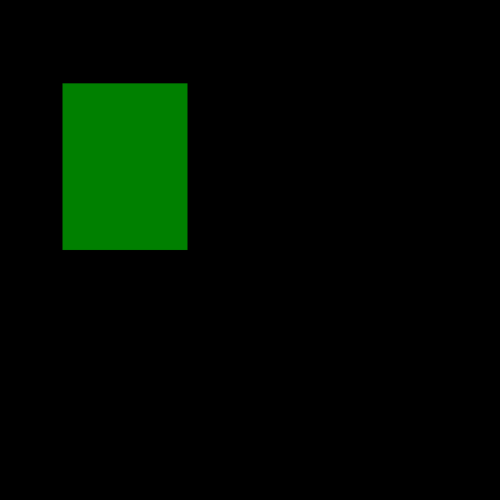

In [27]:
display(slmWidget.create_slm_widget(slm,channel="Green"))


# change Masks

In [ ]:
# slm_InputModes.flipUpDownMasks(pol="H",channel="Red")
# slm.flipRightLeftMasks(pol="H",channel="Red")
# slm.RotateMasks(pol="H",channel="Red",NumberOf90degRots=-1)
# slm.ConjMasks(pol="H",channel="Red")
# slm.TransposeMasks(pol="H",channel="Red")





# Launch Power Meter

In [ ]:
pwrMeter=pwrMetlib.PowerMeterObj()
# pwrMeter=pwrMetlib.PowerMeterObj('USB0::0x1313::0x8076::M01230617::INSTR',wavelength=1550,AvgCount=10)

#call  del pwrMeter to disconnect the power meter
pwrMeter.SetWaveLength(1550)# units are in nm
pwrMeter.GetPower() #units are in Watts

# Launch OSA

In [18]:
del OSA

Exception ignored in: <function OSA_Yoko.__del__ at 0x0000027A729E84A0>
Traceback (most recent call last):
  File "c:\Users\Experiment\Documents\qd_abhiroy\SLMProject\Lab_Equipment\OSA\OSA_Yokogawa_lib.py", line 63, in __del__
    self.OSA.close()  # Close the VISA connection
    ^^^^^^^^
AttributeError: 'OSA_Yoko' object has no attribute 'OSA'


Scope has been disconnected


In [19]:
OSA=OSAlib.OSA_Yoko('GPIB0::1::INSTR')
# OSA=OSAlib.OSA_Yoko()

# call del OSA to disconnect the OSA
#OSA.Initiate_Sweep("AUTO")
# Get some data from the OSA. A inital Sweep should be run on AUTO i.e. OSA.Initiate_Sweep("AUTO")
# so that all the properties of the OSA are set up automatically
# Wavelength,PowerSpectum=OSA.Get_data(TraceChannel="TRA",PowerDensityOutput=0,SweepMode="SINGle",Plotdata=True,)


VisaIOError: ? (-1073807190): Unknown code.

# Launch TimeTagger

In [ ]:
tagger = TimeTagger.createTimeTagger()

In [ ]:
tagger = TimeTagger.createTimeTagger()

In [ ]:
tagger.setInputDelay(1, 0)
tagger.setInputDelay(2, 9850) #ps
# tagger.setInputDelay(3, 0)
# tagger.setInputDelay(4, 0)

CountTime=60
# timeData,CorrData, CorrDataNorm=  TimetaggerFunc.getCorrelations(tagger,measurementChannels=[1,2],
#                                                                  binWidth=200,
#                                                                  binNum=201,
#                                                                  countingTime=CountTime,
#                                                                  PlotResutls=True)

Coincid_Data,timeData,CorrData, CorrDataNorm = TimetaggerFunc.getCoincidencesAndCorrelations(tagger,measurementChannels=[1,2],
                                                                binWidth=50,
                                                                binNum=500,
                                                                countingTime=CountTime,
                                                            PlotResutls=True)

# If you want to get the time delay you can use either of the lines below
AvgTimeDelay_0,PeakTimeDelay_0 = TimetaggerFunc.CalculateTimeDelay(timeData,CorrDataNorm)
print(PeakTimeDelay_0)

# NOTE there is kind of a funciton that can also work out the best trigger level but it doesnt really do to much 0.5 seems good
tagger.setTriggerLevel(1, 0.35)
tagger.setTriggerLevel(2, 0.35)